# Paavo population data exploration

This notebook explores the population-features (`HE`) of Paavo data. We quickly overview the data, process it slightly, and try some basic dimension reduction techniques on it. Finally, we save it for future use.

**NOTE!** This is the first exploration notebook, and hence here we some pre-cleaning of the dataset so that it can be more easily used later in the other notebooks.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from ydata_profiling import ProfileReport

from utils import split_postcode, normalize_by_population

sns.set_theme()

In [2]:
ROOT = Path(".").absolute().parent
DATA = ROOT / "data"
df = pd.read_csv(DATA / "paavo_2022.csv", skiprows=2, na_values=["..."])
df.head()

,Postal code area,X coordinate 2022,Y coordinate 2022,Surface area 2022,"Inhabitants, total (HE) 2022",Males (HE) 2022,Females (HE) 2022,Average age of inhabitants (HE) 2022,0-2 years (HE) 2022,3-6 years (HE) 2022,...,Primary production (TP) 2022,Processing (TP) 2022,Services (TP) 2022,"Inhabitants, total (PT) 2022",Employed (PT) 2022,Unemployed (PT) 2022,Children aged 0 to 14 (PT) 2022,Students (PT) 2022,Pensioners (PT) 2022,Others (PT) 2022
0,00100 Helsinki keskusta - Etu-T��l� (Helsinki),384979,6672361,2353278,18030,8492.0,9538.0,42.0,352.0,372.0,...,25.0,2461.0,52918.0,18030,9979.0,630.0,1656.0,1559.0,3437.0,769.0
1,00120 Punavuori - Bulevardi (Helsinki),385531,6671434,414010,7192,3339.0,3853.0,41.0,139.0,191.0,...,3.0,209.0,7880.0,7192,4018.0,254.0,800.0,517.0,1242.0,361.0
2,00130 Kaartinkaupunki (Helsinki),386244,6671474,428960,1731,851.0,880.0,42.0,48.0,43.0,...,14.0,396.0,13475.0,1731,938.0,47.0,196.0,142.0,297.0,111.0
3,00140 Kaivopuisto - Ullanlinna (Helsinki),386394,6670766,931841,7729,3524.0,4205.0,43.0,170.0,230.0,...,8.0,151.0,2584.0,7729,4028.0,275.0,893.0,556.0,1565.0,412.0
4,00150 Punavuori - Eira - Hernesaari (Helsinki),385320,6670373,1367328,9239,4269.0,4970.0,42.0,181.0,234.0,...,4.0,742.0,3777.0,9239,5230.0,407.0,928.0,636.0,1577.0,461.0


### Quick notes
- Columns have unnecessary ` 2022`-suffix
- `Postal code area` is a bit messy and could be split up.

These should be quickly cleaned up before moving on

In [3]:
df.columns = df.columns.str.strip(" 2022")
df.head()

,Postal code area,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),-2 years (HE),3-6 years (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
0,00100 Helsinki keskusta - Etu-T��l� (Helsinki),384979,6672361,2353278,18030,8492.0,9538.0,42.0,352.0,372.0,...,25.0,2461.0,52918.0,18030,9979.0,630.0,1656.0,1559.0,3437.0,769.0
1,00120 Punavuori - Bulevardi (Helsinki),385531,6671434,414010,7192,3339.0,3853.0,41.0,139.0,191.0,...,3.0,209.0,7880.0,7192,4018.0,254.0,800.0,517.0,1242.0,361.0
2,00130 Kaartinkaupunki (Helsinki),386244,6671474,428960,1731,851.0,880.0,42.0,48.0,43.0,...,14.0,396.0,13475.0,1731,938.0,47.0,196.0,142.0,297.0,111.0
3,00140 Kaivopuisto - Ullanlinna (Helsinki),386394,6670766,931841,7729,3524.0,4205.0,43.0,170.0,230.0,...,8.0,151.0,2584.0,7729,4028.0,275.0,893.0,556.0,1565.0,412.0
4,00150 Punavuori - Eira - Hernesaari (Helsinki),385320,6670373,1367328,9239,4269.0,4970.0,42.0,181.0,234.0,...,4.0,742.0,3777.0,9239,5230.0,407.0,928.0,636.0,1577.0,461.0


Lets clean up the first column by splitting the messy text into post code, name, and municipality. It is split by string slices and regex keys. Baically, the first 5 characters contain the postal code, the next text is the postcode name, and inside the parenthesis is the municipality name. For more details, see `utils.split_postcode`.

In [4]:
df = split_postcode(df)
df.head()

,postcode,name,municipality,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,384979,6672361,2353278,18030,8492.0,9538.0,42.0,...,25.0,2461.0,52918.0,18030,9979.0,630.0,1656.0,1559.0,3437.0,769.0
1,00120,Punavuori - Bulevardi,Helsinki,385531,6671434,414010,7192,3339.0,3853.0,41.0,...,3.0,209.0,7880.0,7192,4018.0,254.0,800.0,517.0,1242.0,361.0
2,00130,Kaartinkaupunki,Helsinki,386244,6671474,428960,1731,851.0,880.0,42.0,...,14.0,396.0,13475.0,1731,938.0,47.0,196.0,142.0,297.0,111.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,386394,6670766,931841,7729,3524.0,4205.0,43.0,...,8.0,151.0,2584.0,7729,4028.0,275.0,893.0,556.0,1565.0,412.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,385320,6670373,1367328,9239,4269.0,4970.0,42.0,...,4.0,742.0,3777.0,9239,5230.0,407.0,928.0,636.0,1577.0,461.0


#### Null values

Lets quickly check the null values in the dataframe:

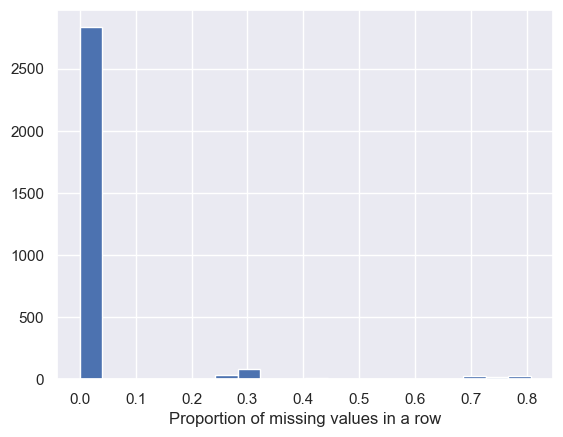

In [5]:
rows_missing = (df.isnull() / df.shape[1]).sum(axis=1)
rows_missing.hist(bins=20)
plt.xlabel("Proportion of missing values in a row")
plt.show()

There are clearly some rows which are missing nearly all of the data. There is no use to keep these around. Lets remove them before further analysis. Lets use threshold as 20% to have as complete data as possible

In [6]:
df = df.loc[rows_missing <= 0.2]
df.head()

,postcode,name,municipality,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
0,00100,Helsinki keskusta - Etu-T��l�,Helsinki,384979,6672361,2353278,18030,8492.0,9538.0,42.0,...,25.0,2461.0,52918.0,18030,9979.0,630.0,1656.0,1559.0,3437.0,769.0
1,00120,Punavuori - Bulevardi,Helsinki,385531,6671434,414010,7192,3339.0,3853.0,41.0,...,3.0,209.0,7880.0,7192,4018.0,254.0,800.0,517.0,1242.0,361.0
2,00130,Kaartinkaupunki,Helsinki,386244,6671474,428960,1731,851.0,880.0,42.0,...,14.0,396.0,13475.0,1731,938.0,47.0,196.0,142.0,297.0,111.0
3,00140,Kaivopuisto - Ullanlinna,Helsinki,386394,6670766,931841,7729,3524.0,4205.0,43.0,...,8.0,151.0,2584.0,7729,4028.0,275.0,893.0,556.0,1565.0,412.0
4,00150,Punavuori - Eira - Hernesaari,Helsinki,385320,6670373,1367328,9239,4269.0,4970.0,42.0,...,4.0,742.0,3777.0,9239,5230.0,407.0,928.0,636.0,1577.0,461.0


Im not yet convinced that I cleaned out all of the null values. Lets see if there are rows with no inhabitants:

In [7]:
# check rows with no residents
df.loc[df["Inhabitants, total (HE)"] == 0]

,postcode,name,municipality,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
12,00230,Helsinki postikeskus,Helsinki,384728,6677128,171851,0,0.0,0.0,0.0,...,0.0,6.0,3516.0,0,0.0,0.0,0.0,0.0,0.0,0.0
124,01770,Martinlaakson teollisuusalue,Vantaa,381413,6685458,188347,0,0.0,0.0,0.0,...,0.0,252.0,1229.0,0,0.0,0.0,0.0,0.0,0.0,0.0
150,02290,Puolarmets�n sairaala,Espoo,372628,6673286,177248,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
270,05850,"Hyvink��, sairaala-alue",Hyvink��,381123,6721292,112332,0,0.0,0.0,0.0,...,0.0,0.0,1952.0,0,0.0,0.0,0.0,0.0,0.0,0.0
344,08360,Kisakallio,Lohja,336759,6690898,454968,0,0.0,0.0,0.0,...,0.0,22.0,68.0,0,0.0,0.0,0.0,0.0,0.0,0.0
427,13530,H�meenlinna sairaala-alue,H�meenlinna,360105,6764390,181248,0,0.0,0.0,0.0,...,0.0,0.0,1829.0,0,0.0,0.0,0.0,0.0,0.0,0.0
490,15980,Messil�,Hollola,421771,6765414,3399089,0,0.0,0.0,0.0,...,0.0,0.0,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0
609,20800,Ammattikorkeakoulu,Turku,239574,6710377,81759,0,0.0,0.0,0.0,...,0.0,0.0,1139.0,0,0.0,0.0,0.0,0.0,0.0,0.0
803,27160,Olkiluoto,Eurajoki,202872,6801959,6307725,0,0.0,0.0,0.0,...,0.0,1153.0,301.0,0,0.0,0.0,0.0,0.0,0.0,0.0
900,31370,Eerikkil�n Urheiluopisto,Tammela,324809,6736414,286460,0,0.0,0.0,0.0,...,0.0,0.0,105.0,0,0.0,0.0,0.0,0.0,0.0,0.0


A lot of just zeros. Although there is some building information, I dont feel like that is enough to justify carrying around this information in the data. Further, these areas are not residential areas at all, with industrial centers, hospitals, school districts, and sports centers. Therefore, we can delete these postcodes from consideration.

In [8]:
# Delete rows with no inhabitants
df = df.loc[df["Inhabitants, total (HE)"] > 0]

Now the data is clean enough for population analysis. Lets also save this dataset for later use in other explorations.

In [9]:
df.to_csv(ROOT / "data/paavo_preclean.csv", index=False)

## Population

The population-related features have `HE` in the colname

In [10]:
cols = df.columns
pop_data = df[cols[cols.str.contains("(HE)")]]
pop_data

/var/folders/dj/8hyf7cyd59g2n7bvjfq0dnm40000gq/T/ipykernel_25562/1326935818.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pop_data = df[cols[cols.str.contains("(HE)")]]


,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),-2 years (HE),3-6 years (HE),7-12 years (HE),13-15 years (HE),16-17 years (HE),18-19 years (HE),...,40-44 years (HE),45-49 years (HE),50-54 years (HE),55-59 years (HE),60-64 years (HE),65-69 years (HE),70-74 years (HE),75-79 years (HE),80-84 years (HE),85 years or over (HE)
0,18030,8492.0,9538.0,42.0,352.0,372.0,709.0,359.0,241.0,318.0,...,1129.0,1172.0,1074.0,1077.0,944.0,768.0,794.0,913.0,498.0,338.0
1,7192,3339.0,3853.0,41.0,139.0,191.0,344.0,183.0,126.0,116.0,...,514.0,491.0,458.0,385.0,342.0,348.0,294.0,319.0,184.0,110.0
2,1731,851.0,880.0,42.0,48.0,43.0,70.0,54.0,32.0,26.0,...,105.0,116.0,139.0,133.0,92.0,88.0,87.0,73.0,33.0,24.0
3,7729,3524.0,4205.0,43.0,170.0,230.0,382.0,170.0,103.0,138.0,...,535.0,492.0,491.0,512.0,451.0,401.0,375.0,412.0,231.0,162.0
4,9239,4269.0,4970.0,42.0,181.0,234.0,392.0,173.0,97.0,143.0,...,675.0,652.0,510.0,531.0,473.0,409.0,388.0,381.0,201.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,142,78.0,64.0,57.0,2.0,1.0,4.0,2.0,0.0,1.0,...,7.0,8.0,6.0,12.0,11.0,19.0,17.0,16.0,6.0,7.0
3021,212,127.0,85.0,54.0,3.0,2.0,6.0,4.0,2.0,2.0,...,17.0,11.0,13.0,21.0,32.0,40.0,16.0,8.0,5.0,3.0
3023,294,170.0,124.0,46.0,6.0,14.0,18.0,14.0,7.0,6.0,...,17.0,18.0,16.0,27.0,25.0,26.0,23.0,11.0,4.0,11.0
3024,667,340.0,327.0,50.0,13.0,20.0,24.0,23.0,17.0,11.0,...,39.0,26.0,41.0,49.0,46.0,60.0,61.0,49.0,38.0,28.0


These columns could be renamed for better readability
- remove extra `(HE)`
- remove capitalization
- replace spaces, hyphens with `_`

In [11]:
pop_colnames_to = [
    "total_inhabitants",
    "males",
    "females",
    "average_age",
    "-2 years (HE)",
    "3-6 years (HE)",
    "7-12 years (HE)",
    "13-15 years (HE)",
    "16-17 years (HE)",
    "18-19 years (HE)",
    "-24 years (HE)",
    "5-29 years (HE)",
    "30-34 years (HE)",
    "35-39 years (HE)",
    "40-44 years (HE)",
    "45-49 years (HE)",
    "50-54 years (HE)",
    "55-59 years (HE)",
    "60-64 years (HE)",
    "65-69 years (HE)",
    "70-74 years (HE)",
    "75-79 years (HE)",
    "80-84 years (HE)",
    "85 years or over (HE)",
]

pop_colnames_to = [s.replace(" (HE)", "") for s in pop_colnames_to]
pop_colnames_to = [s.replace("-", "_") for s in pop_colnames_to]
pop_colnames_to = [s.replace(" ", "_") for s in pop_colnames_to]

pop_colnames_to[4] = "0_2_years"
pop_colnames_to[10] = "20_24_years"
pop_colnames_to[11] = "25_29_years"
pop_colnames_to[-1] = "85_plus"
pop_colnames_to

pop_data = pop_data.rename(columns=dict(zip(pop_data.columns, pop_colnames_to)))
pop_data

,total_inhabitants,males,females,average_age,0_2_years,3_6_years,7_12_years,13_15_years,16_17_years,18_19_years,...,40_44_years,45_49_years,50_54_years,55_59_years,60_64_years,65_69_years,70_74_years,75_79_years,80_84_years,85_plus
0,18030,8492.0,9538.0,42.0,352.0,372.0,709.0,359.0,241.0,318.0,...,1129.0,1172.0,1074.0,1077.0,944.0,768.0,794.0,913.0,498.0,338.0
1,7192,3339.0,3853.0,41.0,139.0,191.0,344.0,183.0,126.0,116.0,...,514.0,491.0,458.0,385.0,342.0,348.0,294.0,319.0,184.0,110.0
2,1731,851.0,880.0,42.0,48.0,43.0,70.0,54.0,32.0,26.0,...,105.0,116.0,139.0,133.0,92.0,88.0,87.0,73.0,33.0,24.0
3,7729,3524.0,4205.0,43.0,170.0,230.0,382.0,170.0,103.0,138.0,...,535.0,492.0,491.0,512.0,451.0,401.0,375.0,412.0,231.0,162.0
4,9239,4269.0,4970.0,42.0,181.0,234.0,392.0,173.0,97.0,143.0,...,675.0,652.0,510.0,531.0,473.0,409.0,388.0,381.0,201.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,142,78.0,64.0,57.0,2.0,1.0,4.0,2.0,0.0,1.0,...,7.0,8.0,6.0,12.0,11.0,19.0,17.0,16.0,6.0,7.0
3021,212,127.0,85.0,54.0,3.0,2.0,6.0,4.0,2.0,2.0,...,17.0,11.0,13.0,21.0,32.0,40.0,16.0,8.0,5.0,3.0
3023,294,170.0,124.0,46.0,6.0,14.0,18.0,14.0,7.0,6.0,...,17.0,18.0,16.0,27.0,25.0,26.0,23.0,11.0,4.0,11.0
3024,667,340.0,327.0,50.0,13.0,20.0,24.0,23.0,17.0,11.0,...,39.0,26.0,41.0,49.0,46.0,60.0,61.0,49.0,38.0,28.0


**Notes**

- For modeling purposes it might be more interesting to normalize the population values by postcode population - this way we would be able to catch areas that are otherwise different sizes but have similar pop structure. This way, we can better compare features between different areas, irrespective of their size. 

Note that the source code for the normalization operation has been moved to `utils` for other script to be able to use the same function.

In [12]:
pop_data = normalize_by_population(
    pop_data, population_col="total_inhabitants", skip_cols=["average_age"]
)
pop_data.head()

,total_inhabitants,males,females,average_age,0_2_years,3_6_years,7_12_years,13_15_years,16_17_years,18_19_years,...,40_44_years,45_49_years,50_54_years,55_59_years,60_64_years,65_69_years,70_74_years,75_79_years,80_84_years,85_plus
0,18030,0.470993,0.529007,42.0,0.019523,0.020632,0.039323,0.019911,0.013367,0.017637,...,0.062618,0.065003,0.059567,0.059734,0.052357,0.042596,0.044038,0.050638,0.027621,0.018747
1,7192,0.464266,0.535734,41.0,0.019327,0.026557,0.047831,0.025445,0.017519,0.016129,...,0.071468,0.068270,0.063682,0.053532,0.047553,0.048387,0.040879,0.044355,0.025584,0.015295
2,1731,0.491623,0.508377,42.0,0.027730,0.024841,0.040439,0.031196,0.018486,0.015020,...,0.060659,0.067013,0.080300,0.076834,0.053148,0.050838,0.050260,0.042172,0.019064,0.013865
3,7729,0.455945,0.544055,43.0,0.021995,0.029758,0.049424,0.021995,0.013326,0.017855,...,0.069220,0.063656,0.063527,0.066244,0.058352,0.051883,0.048519,0.053306,0.029887,0.020960
4,9239,0.462063,0.537937,42.0,0.019591,0.025327,0.042429,0.018725,0.010499,0.015478,...,0.073060,0.070570,0.055201,0.057474,0.051196,0.044269,0.041996,0.041238,0.021756,0.019916


Lets also execute a profiling report to give a quick "dashboard" to the dataset. `ProfileReport` will render an html file which can be nicely and interactively viewed. 
Note that since I know that this is a very basic dataset (and most columns are just bins of the value of total inhabitants), I am running a very basic version of the report, stripping away correlations, heatmaps, etc. leaving only analysis of data distributions and null values. 

In [13]:
profile = ProfileReport(
    pop_data,
    title="Population demographics profile report",
    correlations=None,
    missing_diagrams={"heatmap": False},
    interactions=None,
)
profile.to_file("profile_reports/paavo_population_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Age Pyramid

Before looking at the Profile Report, lets plot age pyramids to see how the age structure of Finland looks like. First, lets do Finland level averages of each age ratio groups

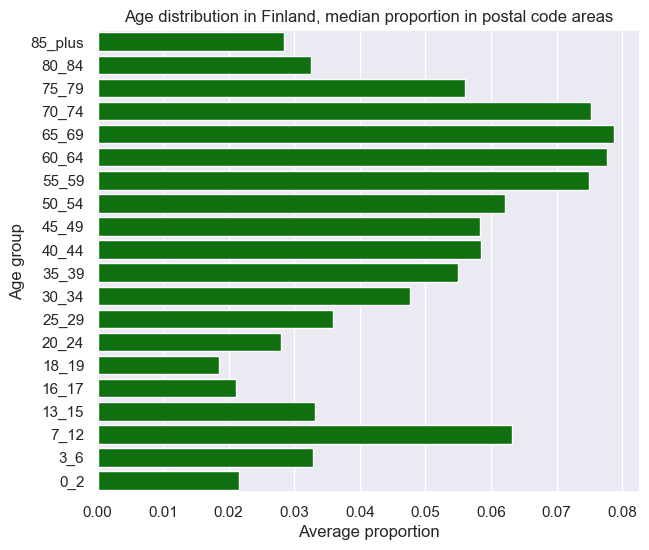

In [14]:
pyram_data = pop_data.drop(columns=["average_age", "total_inhabitants", "males", "females"])
nat_avg = pd.DataFrame(pyram_data.median(axis=0)).reset_index()[::-1]
nat_avg.columns = ["age_group", "average"]
nat_avg["age_group"] = nat_avg["age_group"].str.replace("_years", "")
nat_avg
# set figure size
plt.figure(figsize=(7, 6))
ax1 = sns.barplot(
    x="average", y="age_group", data=nat_avg, order=nat_avg["age_group"], color="green"
)
ax1.set(
    xlabel="Average proportion",
    ylabel="Age group",
    title="Age distribution in Finland, median proportion in postal code areas",
)
plt.show()

Looks like on average, there is significant aging in the Finnish population, as there is a visible bulge in the 50-70 year-old age groups. This backs up the common notion of decreasing fertility in western countries and the [nordics](https://www.norden.org/en/information/population-nordic-region). In addition, there is a curious spike in 7-12 year-olds in Finland. Population dynamics don't specifically explain this, as apart from the covid year 2021, fertility rates have pretty much been in [constant decline](https://pxdata.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__synt/statfin_synt_pxt_12dt.px/table/tableViewLayout1/) all throughout the 21st century. Perhaps, the explanation is instead the structure of the age groups - 7-12 is 5 years, a longer time period than, for example, the 2 and 3-year timespans used in successive age groups. Therefore, the "spike" could just be due to a larger number of people fitting into this group than the others. Nevertheless, the observation of Finland is well observed, and there is a clear decrease in the number of young people in comparison to old.

Objectively, it is difficult to state exaclty what is the "optimal" shape of a population pyramid. From a social welfare perspective, it is necessary that the working age population (20-65) is able to support the yound and elderly. With this, the aging of the Finnish population can be seen as a [risk](https://www.tandfonline.com/doi/full/10.1080/03003930.2021.1877664) for the Finnish welfare system.

### Observations from the ProfileReport

- The number of inhabitants in each area is very skewed to the left. This is expected, as there are a couple of big cities in Finland, surrounded by a large number of rural areas.

#### Sex imbalance

- Some postal codes had a very high unbalance between men and women, with min-max values being around 25% and 75%. This seems quite aggressive, over 3 times more of the other sex in one area. This could be due to smaller postal code areas, as with smaller numbers of inhabitants, minute differences are exaggerated. 

We should print out the data of that area to see if this was a small postal code area that could explain the unbalance.

In [15]:
print(
    f"Population of males in area with most men: {pop_data.loc[pop_data['males'] == pop_data['males'].max(), 'total_inhabitants'].values[0]}"
)
print(
    f"Population of females in area with most women: {pop_data.loc[pop_data['males'] == pop_data['males'].min(), 'total_inhabitants'].values[0]}"
)

Population of males in area with most men: 103
Population of females in area with most women: 3743


So the areas are all probably small or relatively small.


- On average, there are 2% more men that women in Finnish Postal code areas. We should check if this matches the national avg

In [16]:
pop_tot = pop_data["total_inhabitants"].sum()
avg_males = 100 * (pop_data["males"] * pop_data["total_inhabitants"]).sum() / pop_tot
print(f"National proportion of males: {avg_males:.2f}%")

National proportion of males: 49.32%


This is actually not the case at all! On a national level there are more women that men.

This could happen when more women concentrate around larger cities. In that case, the female-dense larger population counts raise the national female count, while still keeping the proportion numbers relatively low.

In [17]:
pop_data[["total_inhabitants", "males", "females"]].sort_values(
    by=["total_inhabitants", "females"], ascending=False
).head(10)

,total_inhabitants,males,females
586,29727,0.459515,0.540485
991,27074,0.533058,0.466942
78,26070,0.487073,0.512927
92,23436,0.487925,0.512075
82,22890,0.471603,0.528397
599,22232,0.506027,0.493973
144,22156,0.485602,0.514398
1906,19299,0.483289,0.516711
275,19092,0.466426,0.533574
990,18541,0.487946,0.512054


As seen above, most of the postalcode with the largest populations have a larger female population. Hence, perhaps this could explain the discrepancy. 

Overall, this is an interesting finding, showing that comparison between area of different sizes is challenging. Although with normalize you could make values comparable, at the same time you might lose their total impacts on a larger scale.

#### Age categories

While it is really interesting to see really small age bins and age characteristics incrementally, this level of detail is probably not that useful for us in practice, especially if in the future we want to create some generic area "profiles" for each postal code area.

This is further backed up by the way people usuall talk about ages and demographics: instead of using specific numbers for categorizing age groups, discretizing terms are usually verbose and generic. For example, people describe age groups as "youth", "children", "teenagers", "retired", or "middle-aged". These terms are usually more indicative descriptions instead of strict limits for into which age group each person belongs to.

Therefore, it would be advisable to do some dimension reduction on these age bins. It could be possible to manually decide these age groups based on basic understanding, e.g. teenagers are 13-19 years old and working age people somewhere between 18-65. However, for the purpose of exploration it could be interesting to see how some component analysis methods would interpret this data. The other positive side of this would be that we can more easily control the number of new components that we want to actually keep.

**NOTE** It is true that `average_age` captures similar information as age categories. In one way, this column could be seen as the compression of all of the possible age categories into one decsriptive feature. Hence, there is a level of duplicity between dimension reduced age categories. However, what this column fails to capture is the age structure of the specific postal code population - a similar average could be built in several different ways. From that point of view is could be valuable to have more age categories as support to gain a more complete understanding of underlying demographics.

--- 

## PCA

One of these options is Principal Component Analysis (PCA), which aims at returning orthogonal data components, representing as much data as possible.

(PCA is a very well explored concept, and one of the first algorithm peoplr gravitate towards when doing something like this. For information, check internet for additional resources)

PCA can be easily done with `scikit-learn`:

In [18]:
from sklearn.decomposition import PCA

In [19]:
pop_for_pca = pop_data.drop(columns=["total_inhabitants", "males", "females", "average_age"])
pop_for_pca

,0_2_years,3_6_years,7_12_years,13_15_years,16_17_years,18_19_years,20_24_years,25_29_years,30_34_years,35_39_years,40_44_years,45_49_years,50_54_years,55_59_years,60_64_years,65_69_years,70_74_years,75_79_years,80_84_years,85_plus
0,0.019523,0.020632,0.039323,0.019911,0.013367,0.017637,0.098613,0.122684,0.093622,0.071769,0.062618,0.065003,0.059567,0.059734,0.052357,0.042596,0.044038,0.050638,0.027621,0.018747
1,0.019327,0.026557,0.047831,0.025445,0.017519,0.016129,0.083843,0.112625,0.099555,0.072164,0.071468,0.068270,0.063682,0.053532,0.047553,0.048387,0.040879,0.044355,0.025584,0.015295
2,0.027730,0.024841,0.040439,0.031196,0.018486,0.015020,0.079145,0.102831,0.069324,0.076834,0.060659,0.067013,0.080300,0.076834,0.053148,0.050838,0.050260,0.042172,0.019064,0.013865
3,0.021995,0.029758,0.049424,0.021995,0.013326,0.017855,0.076465,0.095096,0.078794,0.069737,0.069220,0.063656,0.063527,0.066244,0.058352,0.051883,0.048519,0.053306,0.029887,0.020960
4,0.019591,0.025327,0.042429,0.018725,0.010499,0.015478,0.081935,0.129992,0.102392,0.076956,0.073060,0.070570,0.055201,0.057474,0.051196,0.044269,0.041996,0.041238,0.021756,0.019916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,0.014085,0.007042,0.028169,0.014085,0.000000,0.007042,0.028169,0.042254,0.042254,0.049296,0.049296,0.056338,0.042254,0.084507,0.077465,0.133803,0.119718,0.112676,0.042254,0.049296
3021,0.014151,0.009434,0.028302,0.018868,0.009434,0.009434,0.023585,0.014151,0.047170,0.042453,0.080189,0.051887,0.061321,0.099057,0.150943,0.188679,0.075472,0.037736,0.023585,0.014151
3023,0.020408,0.047619,0.061224,0.047619,0.023810,0.020408,0.037415,0.037415,0.044218,0.054422,0.057823,0.061224,0.054422,0.091837,0.085034,0.088435,0.078231,0.037415,0.013605,0.037415
3024,0.019490,0.029985,0.035982,0.034483,0.025487,0.016492,0.038981,0.050975,0.043478,0.049475,0.058471,0.038981,0.061469,0.073463,0.068966,0.089955,0.091454,0.073463,0.056972,0.041979


PCA also requires no nulls to be present, so we should check that we have no nulls in the data:

In [20]:
(pop_for_pca.isnull().sum(axis=1) == 0).all()

True

Indeed. We can move on to PCA

In [21]:
pca = PCA(n_components=8)
pop_pca = pca.fit_transform(pop_for_pca)

In [22]:
pca.explained_variance_ratio_

array([0.40673051, 0.15791394, 0.06828237, 0.05867757, 0.04246463,
       0.03768359, 0.03473125, 0.03237121])

In [23]:
print(
    f"Variance explained by first three components: {100 * sum(pca.explained_variance_ratio_[:3]) :.2f}%"
)

Variance explained by first three components: 63.29%


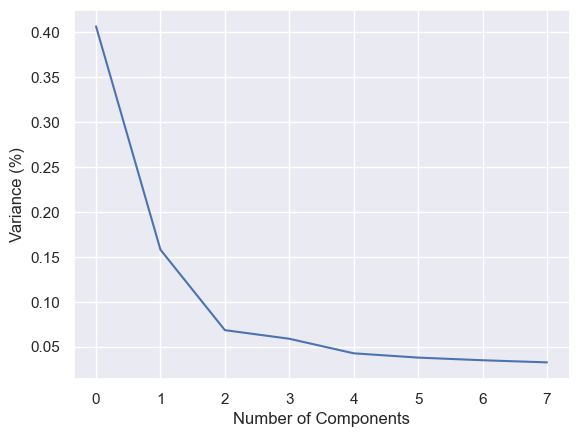

In [24]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.show()

It seems that PCA returned one larger component, with ~40% of the variance explained, with the second component explaining around ~15%. The rest are quite small, all below 10%. 

Text(0, 0.5, 'Third Principal Component')

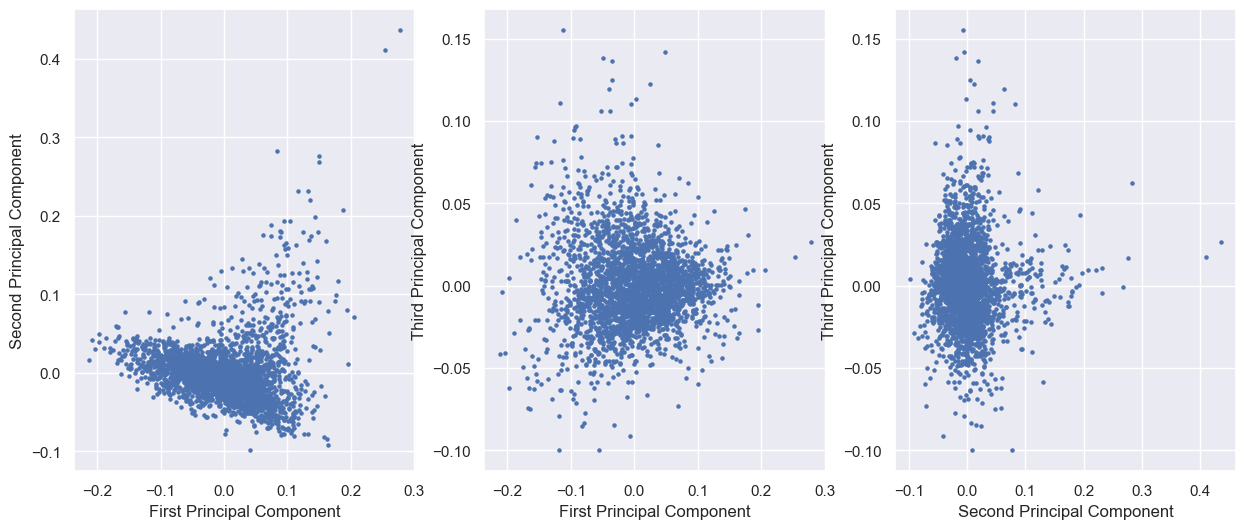

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

axs[0].scatter(pop_pca[:, 0], pop_pca[:, 1], s=5)
axs[0].set_xlabel("First Principal Component")
axs[0].set_ylabel("Second Principal Component")
# axs[0].set_ylim([-0.2, 0.5])

axs[1].scatter(pop_pca[:, 0], pop_pca[:, 2], s=5)
axs[1].set_xlabel("First Principal Component")
axs[1].set_ylabel("Third Principal Component")

axs[2].scatter(pop_pca[:, 1], pop_pca[:, 2], s=5)
axs[2].set_xlabel("Second Principal Component")
axs[2].set_ylabel("Third Principal Component")

The first and third principal components are more difficult to interpret, as the component data forms a uniform shape. A guess could hence be made that those two components represent similar characterists. This is also supported by somewhat similar shapes in the first and last figure (1st vs 2nd and 1st vs 3rd return similar shapes).

Lets plot the original features on the PCA map

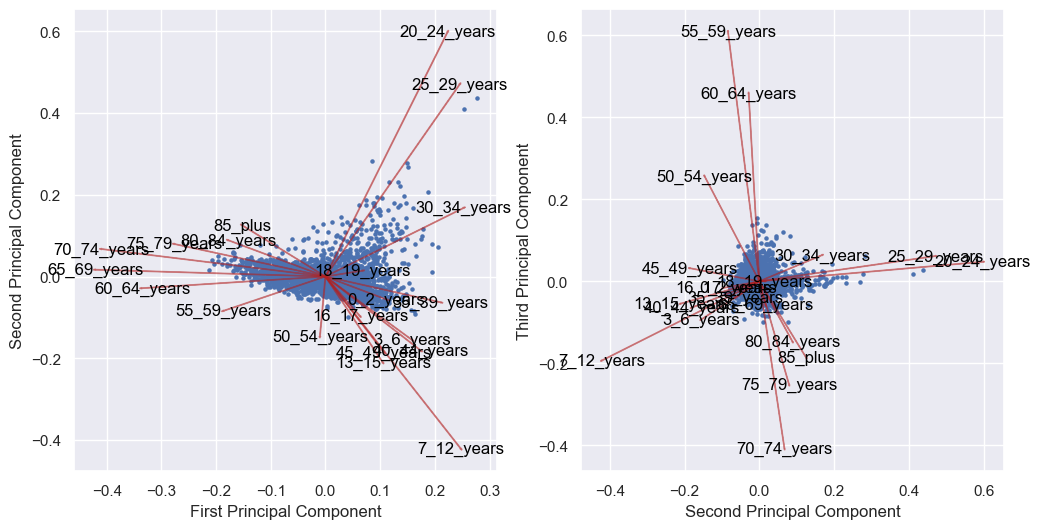

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(pop_pca[:, 0], pop_pca[:, 1], s=5)
axs[0].set_xlabel("First Principal Component")
axs[0].set_ylabel("Second Principal Component")

# Add component vectors
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    axs[0].arrow(0, 0, comp1, comp2, color="firebrick", alpha=0.5)
    if df.columns is not None:
        axs[0].text(comp1, comp2, pop_for_pca.columns[i], color="black", ha="center", va="center")

comp_1 = 1
comp_2 = 2
axs[1].scatter(pop_pca[:, comp_1], pop_pca[:, comp_2], s=5)
axs[1].set_xlabel("Second Principal Component")
axs[1].set_ylabel("Third Principal Component")

# Add component vectors
for i, (comp1, comp2) in enumerate(zip(pca.components_[comp_1], pca.components_[comp_2])):
    axs[1].arrow(0, 0, comp1, comp2, color="firebrick", alpha=0.5)
    if df.columns is not None:
        axs[1].text(comp1, comp2, pop_for_pca.columns[i], color="black", ha="center", va="center")

In [27]:
# Assume df is your original DataFrame and pca is your fitted PCA model
loadings = pd.DataFrame(pca.components_, columns=pop_for_pca.columns).T
loadings[0].sort_values()

65_69_years   -0.420244
70_74_years   -0.408820
60_64_years   -0.335399
75_79_years   -0.275817
55_59_years   -0.185908
80_84_years   -0.177455
85_plus       -0.152242
50_54_years   -0.010093
16_17_years    0.062965
18_19_years    0.067569
13_15_years    0.104782
45_49_years    0.106735
0_2_years      0.111637
3_6_years      0.158623
40_44_years    0.174305
35_39_years    0.210812
20_24_years    0.223434
25_29_years    0.245508
7_12_years     0.247385
30_34_years    0.252221
Name: 0, dtype: float64

In [28]:
loadings[1].sort_values()

7_12_years    -0.420861
13_15_years   -0.209936
45_49_years   -0.185417
40_44_years   -0.181041
3_6_years     -0.155439
50_54_years   -0.146144
16_17_years   -0.096524
55_59_years   -0.083719
35_39_years   -0.063211
0_2_years     -0.056214
60_64_years   -0.028557
18_19_years    0.014220
65_69_years    0.016676
70_74_years    0.067107
75_79_years    0.079392
80_84_years    0.088592
85_plus        0.125193
30_34_years    0.167455
25_29_years    0.470143
20_24_years    0.598286
Name: 1, dtype: float64

We can see that older age groups have larger negative association with the first component, and on the other end, some young adult age groups showed to have larger loadings. Therefore, this component could be interpreted to be a "working population age" component. The other componest are no so clear, although they exhibit somewhat similar relationships.

Another thing that we could investigate is the two outliers that can be seen in the top-right corner of the left-hand figure


In [29]:
outliers = pd.DataFrame(pop_pca).sort_values(by=1)[-2:].index

df.loc[outliers]

,postcode,name,municipality,X coordinate,Y coordinate,Surface area,"Inhabitants, total (HE)",Males (HE),Females (HE),Average age of inhabitants (HE),...,Primary production (TP),Processing (TP),Services (TP),"Inhabitants, total (PT)",Employed (PT),Unemployed (PT),Children aged 0 to 14 (PT),Students (PT),Pensioners (PT),Others (PT)
136,02130,Pohjois-Tapiola,Espoo,378046,6674616,2501956,6646,3261.0,3385.0,41.0,...,1.0,341.0,3549.0,6646,3125.0,168.0,1290.0,556.0,1256.0,251.0
2493,85820,Oksava,Haapaj�rvi,413965,7078354,124820701,817,443.0,374.0,45.0,...,54.0,5.0,46.0,817,333.0,30.0,154.0,46.0,245.0,9.0


In [30]:
pop_data.loc[outliers]

,total_inhabitants,males,females,average_age,0_2_years,3_6_years,7_12_years,13_15_years,16_17_years,18_19_years,...,40_44_years,45_49_years,50_54_years,55_59_years,60_64_years,65_69_years,70_74_years,75_79_years,80_84_years,85_plus
136,6646,0.490671,0.509329,41.0,0.027836,0.044388,0.092838,0.042281,0.026933,0.023774,...,0.086368,0.076136,0.060187,0.053115,0.053416,0.046645,0.046494,0.043184,0.025730,0.026181
2493,817,0.542228,0.457772,45.0,0.022032,0.058752,0.072215,0.047736,0.030600,0.018360,...,0.050184,0.052632,0.080783,0.073439,0.073439,0.085679,0.067319,0.050184,0.028152,0.030600


And checking these values in comparison feature-based to averages:

(I print out results as percentage difference in comparison to the column-wise mean)

In [31]:
outlier_rows = pop_data.loc[outliers]
means = pop_data.mean(axis=0).values

100 * (outlier_rows - means) / means

,total_inhabitants,males,females,average_age,0_2_years,3_6_years,7_12_years,13_15_years,16_17_years,18_19_years,...,40_44_years,45_49_years,50_54_years,55_59_years,60_64_years,65_69_years,70_74_years,75_79_years,80_84_years,85_plus
136,241.498293,-5.484618,5.921333,-13.789118,26.365404,34.050658,45.606585,25.691996,27.081060,30.370660,...,49.203688,30.119761,-4.943926,-32.419805,-35.462024,-44.311677,-41.430110,-26.72659,-27.115325,-16.911067
2493,-58.019244,4.446454,-4.800504,-5.378300,0.015486,77.429754,13.262501,41.907121,44.379684,0.682112,...,-13.305848,-10.050350,27.585728,-6.559691,-11.268767,2.291316,-15.195891,-14.84961,-20.254492,-2.888151


### PCA Outcomes

Honestly, I dont see anything drastically different or alarming - they are simply normal and unique areas in their own ways. Pohjois-Tapiola seems to be a lot younger than the average, with more young and working age people and less elderly people. These values are by no means extreme or implausible, and hence there is no further outlier management that we need to do. (Actually, it would have been an interesting visualization idea to plot a population pyramid, overalying Pohjois-Tapiola on top of the Finnish averages. Maybe next time...)

Overall, however, this PCA didn't really reveal any significant age "groups" that could be direclty applied. Although there was some clear "elderly or young adult" components that could be extracted from here, the other groups were not distinguished enough. Further, since the total explained variance with the first 3 components is so low, about 64%, I would personally move forward with these semi-forced "intelligent" components. Instead, I would avoid this loss of explained variance, and just manually group age groups into larger bins. 

Sometimes the most simple solution is the best one :) but it was interesting to try!

---

## Manual binning

Below I create the new age groups. There will be four:
- 0-24 year-olds (youth, young adults)
- 25-44 year-olds (young professionals)
- 45-64 year-olds (middle-aged, older professionals)
- 65+ (retired, elderly)

In [32]:
youth_cols = [
    "0_2_years",
    "3_6_years",
    "7_12_years",
    "13_15_years",
    "16_17_years",
    "18_19_years",
    "20_24_years",
]
young_adults_cols = ["25_29_years", "30_34_years", "35_39_years", "40_44_years"]
middle_aged_cols = ["45_49_years", "50_54_years", "55_59_years", "60_64_years"]
elderly_aged_cols = ["65_69_years", "70_74_years", "75_79_years", "80_84_years", "85_plus"]

groups_list = [youth_cols, young_adults_cols, middle_aged_cols, elderly_aged_cols]
new_cols = ["youth", "adults", "middle_age", "elders"]
for colname, group in zip(new_cols, groups_list):
    pop_data[colname] = pop_data[group].sum(axis=1)

pop_data = pop_data[["total_inhabitants", "males", "females", "average_age", *new_cols]]

This data is now clean and ready for export and further usage.

In [33]:
pop_data.to_csv(DATA / "paavo_pop_clean.csv")